# Fuzzy project
# Takagi-Sugeno modeling for saddle function
# Sajad Hosseini Najafabadi - 400301997
# --------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating data:

In [2]:
m = 200 # Number of data samples
# Generating data in [-5, 5] interval for inputs => x1 and x2 are effective inputs:
x1 = np.random.default_rng(seed=1).uniform(low=-5, high=5, size=(m,))
x2 = np.random.default_rng(seed=2).uniform(low=-5, high=5, size=(m,))

# Generating 2 dummy inputs:
x3 = np.random.default_rng(seed=3).uniform(low=-5, high=5, size=(m,))
x4 = np.random.default_rng(seed=4).uniform(low=-5, high=5, size=(m,))

# Generating white gaussian noise with zero mean and standard deviation of 1:
noise_gaussian = np.random.default_rng(seed=0).normal(0,1,m)

# Defining saddle function:
def saddle(x1, x2, noise=False):
    if noise:
        y = (x1**2 - x2**2) + noise_gaussian
    else:
        y = (x1**2 - x2**2)
    return y

## 1. Algorithm of Single input with two rules:

### Premise Parameters Identification:

### For Premise Parameters Identification, the original paper has used the complex optimization method:

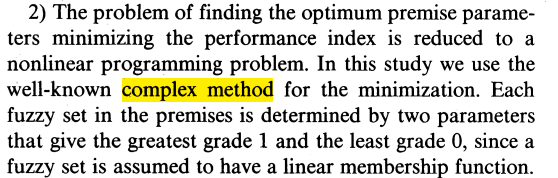

### This could be tricky! But I have another idea!

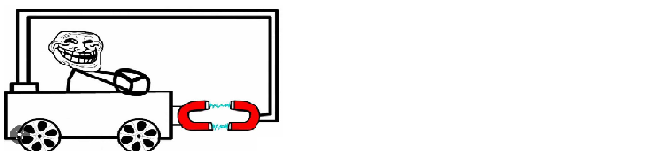

### I decided to use the grid search method instead :

In [3]:
def premise(a_small, b_small, a_big, b_big):
    # Defining membership functions:
    def small(x, a=a_small, b=b_small):
        if x <= a:
            mu = 1
        elif a < x < b:
            mu = (x-b)/(a-b)
        else:
            mu = 0
        return mu

    def big(x, a=a_big, b=b_big):
        if x >= b:
            mu = 1
        elif a < x < b:
            mu = 1 - (x-b)/(a-b)
        else:
            mu = 0
        return mu
    return small, big

In [4]:
# Grid search method:
def takagi_sugeno(y,Input):
    print('Please wait until the run ends...')
    save_e = 10**10
    for a1 in range(-5,5):
        for b1 in range(5,a1,-1):
            for a2 in range(-5,5):
                for b2 in range(5,a2,-1):
                    small, big = premise(a1,b1,a2,b2)
                    pred, e = Consequence(y,Input,small, big)
                    if e < save_e:
                        save_e = e
                        save_a1 = a1
                        save_b1 = b1
                        save_a2 = a2
                        save_b2 = b2
                        save_pred = pred
                        
    # load the saved items:
    e = save_e
    pred = save_pred
    a1 = save_a1
    b1 = save_b1
    a2 = save_a2
    b2 = save_b2
    s, b = premise(a1,b1,a2,b2)
    
    return pred, e, s, b

### Consequence Parameters Identification:


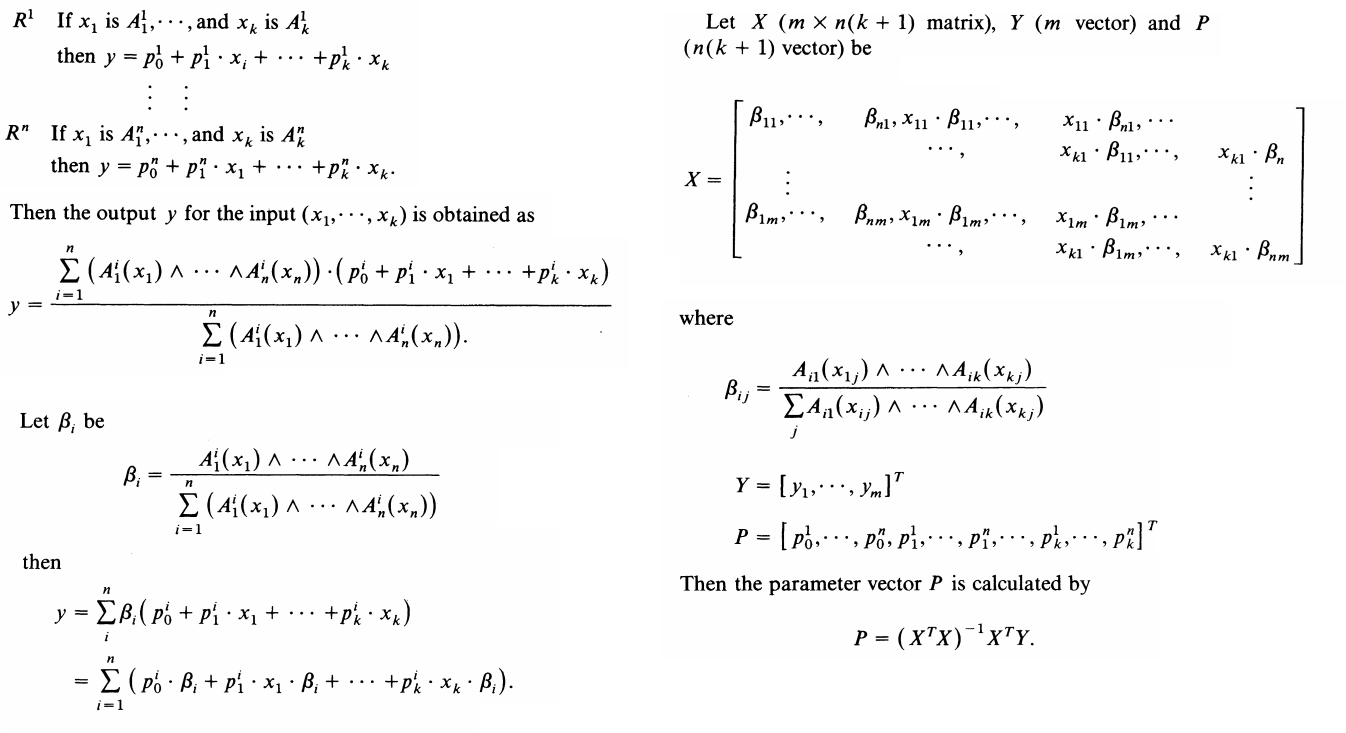

In [5]:
def Consequence(y,x,small,big): 
    # Defining the X matrix as it was introduced in the article:
    X = np.zeros((m, n*(k+1)))
    for t in range(m):
        alpha = small(x[t])
        beta = big(x[t])
        if (alpha==0 and beta==0):
            X[t] = np.array([0, 0, 0, 0]) 
        else:
            X[t] = 1/(alpha + beta) * np.array([alpha, beta, alpha * x[t], beta*x[t]])
    
    # Consequence Parameters Identification:
    P = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Calculating model predictions:
    pred = np.zeros(m)
    for t in range(m):
        alpha = small(x[t])
        beta = big(x[t])
        if (alpha==0 and beta==0):
            pred[t] = np.array(0) 
        else:
            pred[t] = 1/(alpha + beta) * ((alpha * (P[0]+P[1]*x[t])) + beta * (P[2]+P[3]*x[t]))
    
    # Calculating the error:
    e = ((y-pred)**2).sum()/m
    return pred, e

In [6]:
def show_results(pred, e, small, big):
    # Calculating the shape of the membership functions:
    x = np.arange(-5,6)
    mu_small = np.zeros(len(x))
    mu_big = np.zeros(len(x))
    for i in range(len(x)):
        mu_small[i] = small(x[i])
        mu_big[i] = big(x[i])

    # print the results
    print(f'Done!\nError: {e:.2f}')

    fig = plt.figure(figsize=(8,4))
    plt.plot(x,mu_small)
    plt.plot(x,mu_big)
    plt.xlim(-5,5)
    plt.ylim(-0.01,1.01)
    plt.xticks(x)
    plt.xlabel('x')
    plt.ylabel('$\mu$')
    plt.legend(['small','big'])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter (x1, x2, y, c='g', marker='o')
    ax.scatter (x1, x2, pred, c='y', marker='x')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    ax.set_title(f'Error= {e:.2f}')
    plt.legend(['Real output','Predected output'])

## 1.A. Model: x1
### Saddle function without noise:

Please wait until the run ends...
Done!
Error: 57.78


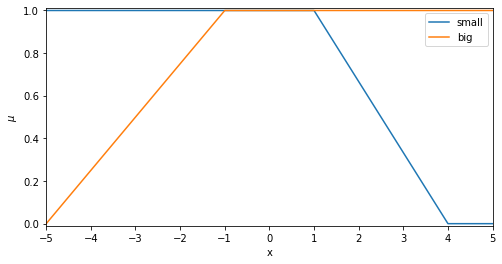

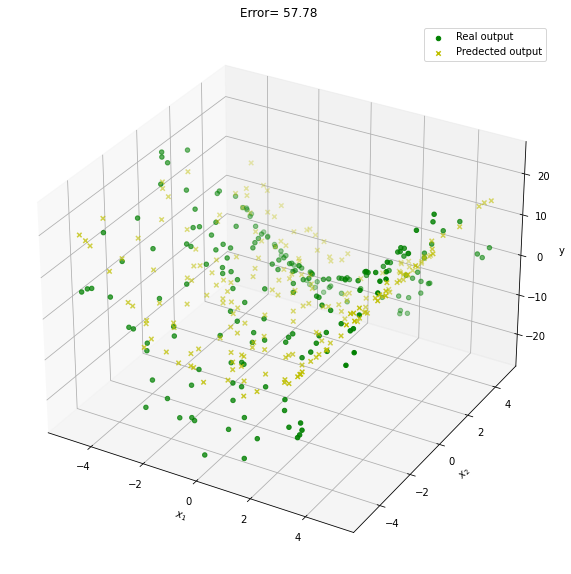

In [7]:
# Saddle function without noise
y = saddle(x1, x2, noise=False)
# Model: x1
Input = x1
n = 2 # Nember of rules
k = 1 # Number of inputs considered for the Takagi-Sugeno model

pred, e, small, big = takagi_sugeno(y,Input)

show_results(pred, e, small, big)

### As the result, the error is 57.78 considering the x1 as the input for the saddle function without the noise.
### Now check saddle function with noise:

Please wait until the run ends...
Done!
Error: 58.03


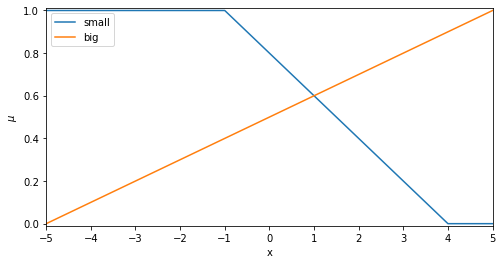

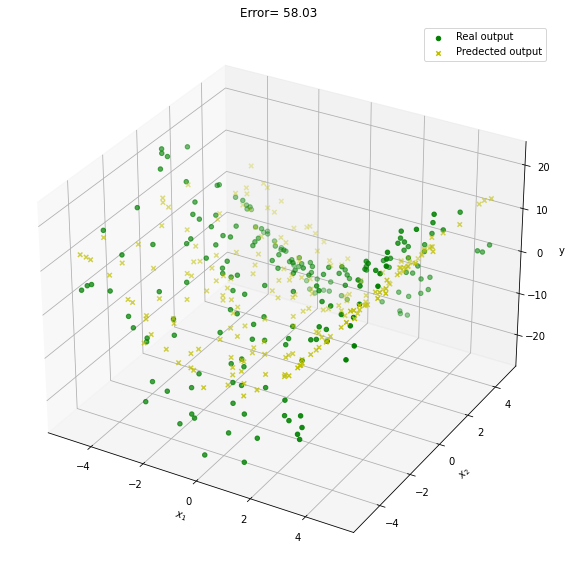

In [8]:
# Saddle function with noise
y = saddle(x1, x2, noise=True)

pred, e, small, big = takagi_sugeno(y, Input)

show_results(pred, e, small, big)

### The error is 58.03 which is just a bit higher than 57.78. So it shows the robustness of the model against noisy data.

### *In general, noise increases the error a little, but nothing strange will happen in the modeling. For the rest of all reports, only the results with noisy output are shown to save the pages of the report. You can easily set the noise parameter to False to see the results without noise.*

## 1.B. Model: x2

Please wait until the run ends...
Done!
Error: 50.33


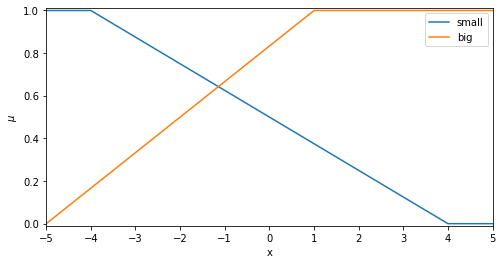

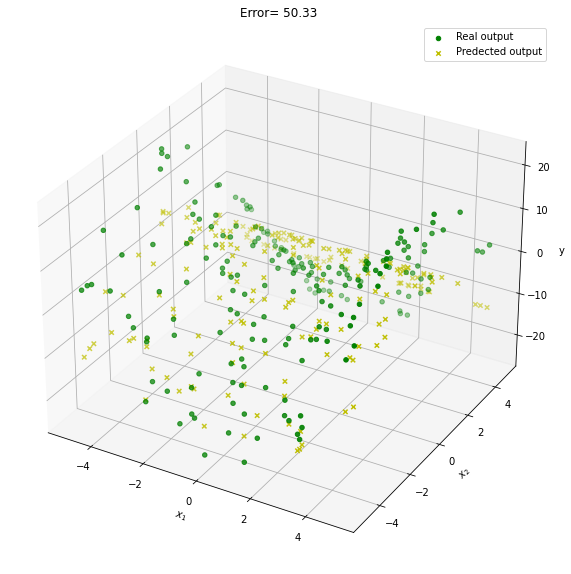

In [9]:
# Model: x2
Input = x2

pred, e, small, big = takagi_sugeno(y,Input)

show_results(pred, e, small, big)

### The error is 50.33 considering the x2 as the input for the saddle function.

## 1.C. Model: x3

Please wait until the run ends...
Done!
Error: 103.16


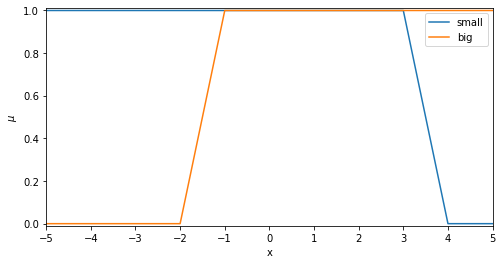

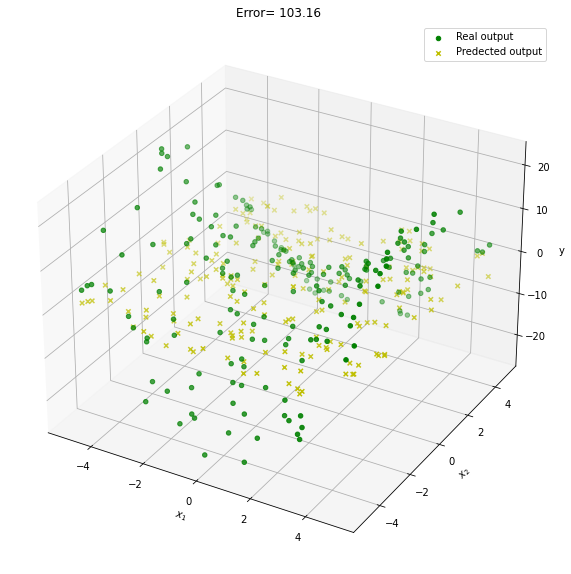

In [10]:
# Model: x2
Input = x3

pred, e, small, big = takagi_sugeno(y,Input)

show_results(pred, e, small, big)

### The error is 103.16 considering the x3 as the input for the saddle function.

## 1.D. Model: x4

Please wait until the run ends...
Done!
Error: 102.19


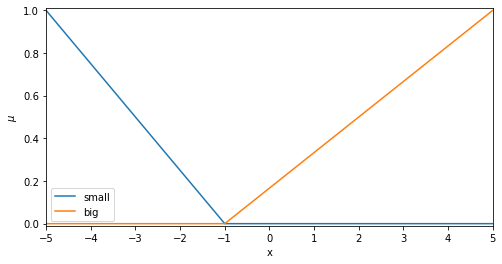

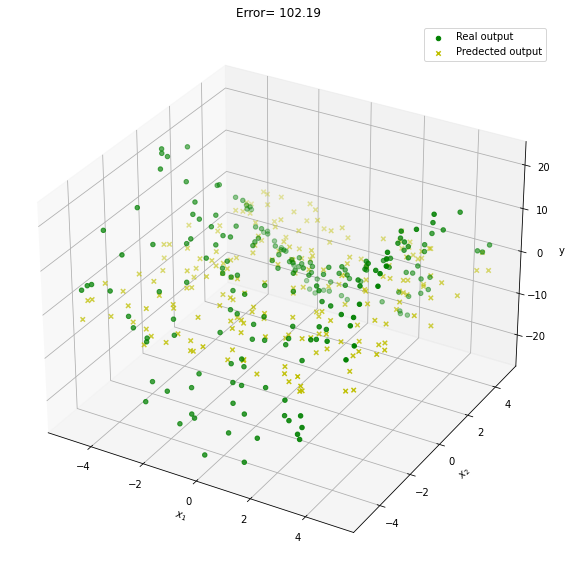

In [11]:
# Model: x4
Input = x4

pred, e, small, big = takagi_sugeno(y,Input)

show_results(pred, e, small, big)

### The error is 102.19 considering the x4 as the input for the saddle function.

### So for Saddle function the errors are as follows:
### x2, x1, x4, x3 with 50.33, 58.03, 102.19, 103.16
### So it works! It has recognized the dummy inputs correctly.

## 2. Algorithm of Single input with four rules:
### Premise Parameters Identification:
### The grid search method in 8D space takes a long time. But I have another idea to deal with that.

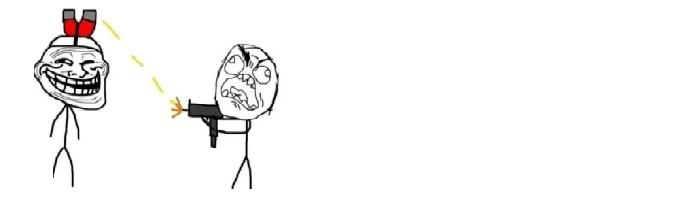

### I decided to freeze the membership function of the selected input from the previous stage and run the grid search method in 4D to find the membership function of the new input.

In [12]:
def premise(a_very_small, b_very_small, a_small, b_small, a_big, b_big, a_very_big, b_very_big):
    # Defining membership functions:
    def very_small(x, a=a_very_small, b=b_very_small):
        if x <= a:
            mu = 1
        elif a < x < b:
            mu = (x-b)/(a-b)
        else:
            mu = 0
        return mu

    def small(x, a=a_small, b=b_small):
        if x <= a:
            mu = 1
        elif a < x < b:
            mu = (x-b)/(a-b)
        else:
            mu = 0
        return mu
    
    def big(x, a=a_big, b=b_big):
        if x >= b:
            mu = 1
        elif a < x < b:
            mu = 1 - (x-b)/(a-b)
        else:
            mu = 0
        return mu
    
    def very_big(x, a=a_very_big, b=b_very_big):
        if x >= b:
            mu = 1
        elif a < x < b:
            mu = 1 - (x-b)/(a-b)
        else:
            mu = 0
        return mu
    
    return very_small, small, big, very_big

In [13]:
# Grid search method in 4D insted of 8D:
def takagi_sugeno(y, Input):
    a_small = -4
    b_small = 4
    a_big = -5
    b_big = 1
    print('Please wait until the run ends...')
    save_e = 10**10
    for a_very_small in range(-5,5):
        for b_very_small in range(5,a_very_small,-1):
            for a_very_big in range(-5,5):
                for b_very_big in range(5,a_very_big,-1):
                    very_small, small, big, very_big = premise(a_very_small, b_very_small, a_small, b_small, a_big, 
                                                               b_big, a_very_big, b_very_big)
                    pred, e = Consequence(y, Input, very_small, small, big, very_big) 
                    if e < save_e:
                        save_e = e
                        save_a_very_small = a_very_small
                        save_b_very_small = b_very_small
                        save_a_small = a_small
                        save_b_small = b_small
                        save_a_big = a_big
                        save_b_big = b_big
                        save_a_very_big = a_very_big
                        save_b_very_big = b_very_big
                        save_pred = pred

    # load the saved items:
    e = save_e
    pred = save_pred
    a_very_small = save_a_very_small
    b_very_small = save_b_very_small
    a_small = save_a_small
    b_small = save_b_small
    a_big = save_a_big
    b_big = save_b_big
    a_very_big = save_a_very_big
    b_very_big = save_b_very_big
    vs, s, b, vb = premise(a_very_small, b_very_small, a_small, b_small, a_big, b_big, a_very_big, b_very_big)
    return pred, e, vs, s, b, vb

In [14]:
def Consequence(y, x, very_small, small, big, very_big): 
    # Defining the X matrix as it was introduced in the article:
    X = np.zeros((m, n*(k+1)))
    for t in range(m):
        alpha_1 = very_small(x[t])
        alpha_2 = small(x[t])
        beta_1 = big(x[t])
        beta_2 = very_big(x[t])
        if ( alpha_1 + alpha_2 +  beta_1 + beta_2 )==0:
            X[t] = np.zeros(8) 
        else:
            X[t] = 1/( alpha_1 + alpha_2 +  beta_1 + beta_2 )\
                    * np.array([alpha_1, beta_1, alpha_2, beta_2,\
                                alpha_1 * x[t], beta_1 * x[t], alpha_2 * x[t], beta_2 * x[t]])
    
    # Consequence Parameters Identification:
    if np.linalg.det(X.T @ X)!=0:
        P = np.linalg.inv(X.T @ X) @ X.T @ y
    else:
        P = np.zeros(8)
        
    # Calculating model predictions:
    pred = np.zeros(m)
    for t in range(m):
        alpha_1 = very_small(x[t])
        alpha_2 = small(x[t])
        beta_1 = big(x[t])
        beta_2 = very_big(x[t])
        if ( alpha_1 + alpha_2 +  beta_1 + beta_2 )==0:
            pred[t] = np.array(0) 
        else:
            pred[t] = 1/( alpha_1 + alpha_2 +  beta_1 + beta_2 )\
                      * ((alpha_1 * (P[0]+P[1]*x[t])) +\
                         (beta_1 * (P[2]+P[3]*x[t])) +\
                         (alpha_2 * (P[4]+P[5]*x[t])) +\
                         (beta_2 * (P[6]+P[7]*x[t]))) 
    
    # Calculating the error:
    e = ((y-pred)**2).sum()/m
    return pred, e

In [15]:
def show_results(pred, e, very_small, small, big, very_big):
    # Calculating the shape of the membership functions:
    x = np.arange(-5,6)
    mu_small_1 = np.zeros(len(x))
    mu_big_1 = np.zeros(len(x))
    mu_small_2 = np.zeros(len(x))
    mu_big_2 = np.zeros(len(x))
    for i in range(len(x)):
        mu_small_1[i] = very_small(x[i])
        mu_small_2[i] = small(x[i])
        mu_big_1[i] = big(x[i])
        mu_big_2[i] = very_big(x[i])

    # print the results
    print(f'Done!\nError: {e:.2f}')

    fig = plt.figure(figsize=(8,4))
    plt.plot(x,mu_small_1)
    plt.plot(x,mu_big_1)
    plt.xlim(-5,5)
    plt.ylim(-0.01,1.01)
    plt.xticks(x)
    plt.xlabel('x')
    plt.ylabel('$\mu$')
    plt.legend(['small','big'])

    fig = plt.figure(figsize=(8,4))
    plt.plot(x,mu_small_2)
    plt.plot(x,mu_big_2)
    plt.xlim(-5,5)
    plt.ylim(-0.01,1.01)
    plt.xticks(x)
    plt.xlabel('x')
    plt.ylabel('$\mu$')
    plt.legend(['vary small','vary big'])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter (x1, x2, y, c='g', marker='o')
    ax.scatter (x1, x2, pred, c='y', marker='x')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    ax.set_title(f'Error= {e:.2f}')
    plt.legend(['Real output','Predected output'])

## 2.A. Model: x2-x2

Please wait until the run ends...
Done!
Error: 56.05


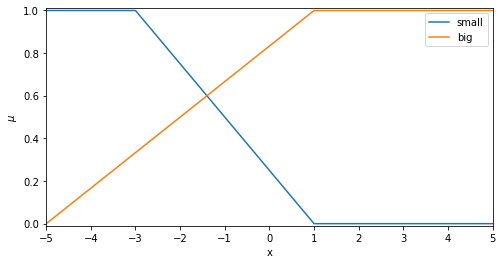

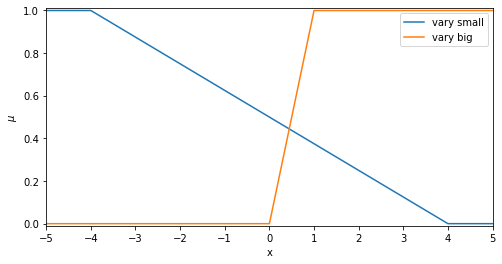

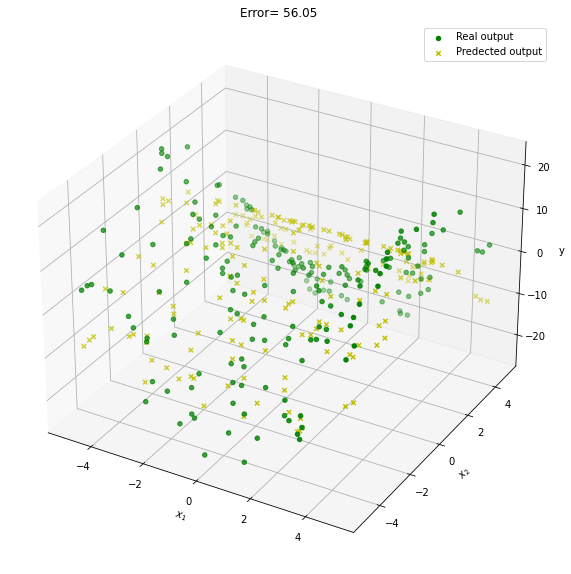

In [16]:
# Model: x2-x2
Input = x2
n = 4 # Nember of rules
k = 1 # Number of inputs considered for the Takagi-Sugeno model

pred, e, very_small, small, big, very_big = takagi_sugeno(y, Input)

show_results(pred, e, very_small, small, big, very_big)

### The error for x2-x2 is 56.05, which is more than 50.33, so this is not a suitable choice.

## 3. Algorithm of two inputs and four rules:
### Premise Parameters Identification:
### The grid search method in 8D space takes a long time. So I decided to freeze the membership function of the selected input from the previous stage and run the grid search method in 4D to find the membership function of the new input.

In [17]:
def premise(a_small_1, b_small_1, a_big_1, b_big_1, a_small_2,
            b_small_2, a_big_2, b_big_2):
    # Defining membership functions:
    def small_1(x, a=a_small_1, b=b_small_1):
        if x <= a:
            mu = 1
        elif a < x < b:
            mu = (x-b)/(a-b)
        else:
            mu = 0
        return mu

    def big_1(x, a=a_big_1, b=b_big_1):
        if x >= b:
            mu = 1
        elif a < x < b:
            mu = 1 - (x-b)/(a-b)
        else:
            mu = 0
        return mu
    
    def small_2(x, a=a_small_2, b=b_small_2):
        if x <= a:
            mu = 1
        elif a < x < b:
            mu = (x-b)/(a-b)
        else:
            mu = 0
        return mu
    
    def big_2(x, a=a_big_2, b=b_big_2):
        if x >= b:
            mu = 1
        elif a < x < b:
            mu = 1 - (x-b)/(a-b)
        else:
            mu = 0
        return mu
    
    return small_1, big_1, small_2, big_2

In [18]:
def takagi_sugeno(y, Input):
    a_small_1 = -4
    b_small_1 = 4
    a_big_1 = -5
    b_big_1 = 1
    print('Please wait until the run ends...')
    save_e = 10**10
    for a_small_2 in range(-5,5):
        for b_small_2 in range(5,a_small_2,-1):
            for a_big_2 in range(-5,5):
                for b_big_2 in range(5,a_big_2,-1):
                    small_1, big_1, small_2, big_2 = premise(a_small_1, b_small_1, a_big_1, b_big_1, a_small_2, 
                                                             b_small_2, a_big_2, b_big_2)
                    pred, e = Consequence(Input[0], Input[1], small_1, big_1, small_2, big_2) 
                    if e < save_e:
                        save_e = e
                        save_a_small_1 = a_small_1
                        save_b_small_1 = b_small_1
                        save_a_big_1 = a_big_1
                        save_b_big_1 = b_big_1
                        save_a_small_2 = a_small_2
                        save_b_small_2 = b_small_2
                        save_a_big_2 = a_big_2
                        save_b_big_2 = b_big_2
                        save_pred = pred

    # load the saved items:
    e = save_e
    pred = save_pred
    a_small_1 = save_a_small_1
    b_small_1 = save_b_small_1
    a_big_1 = save_a_big_1
    b_big_1 = save_b_big_1
    a_small_2 = save_a_small_2
    b_small_2 = save_b_small_2
    a_big_2 = save_a_big_2
    b_big_2 = save_b_big_2
    s1, b1, s2, b2 = premise(a_small_1, b_small_1, a_big_1, b_big_1,a_small_2, b_small_2, a_big_2, b_big_2)
    return pred, e, s1, b1, s2, b2

In [19]:
def Consequence(x1, x2, small_1, big_1, small_2, big_2): 
    # Defining the X matrix as it was introduced in the article:
    X = np.zeros((m, n*(k+1)))
    for t in range(m):
        alpha_1 = small_1(x1[t])
        beta_1 = big_1(x1[t])
        alpha_2 = small_2(x2[t])
        beta_2 = big_2(x2[t])
        if (min(alpha_1,alpha_2)+min(alpha_1,beta_2)+min(beta_1,alpha_2)+min(beta_1,beta_2))==0:
            X[t] = np.zeros(12) 
        else:
            X[t] = 1/(min(alpha_1,alpha_2)+min(alpha_1,beta_2)+min(beta_1,alpha_2)+min(beta_1,beta_2))\
                    * np.array([min(alpha_1,alpha_2), min(alpha_1,beta_2), min(beta_1,alpha_2), min(beta_1,beta_2),\
                                min(alpha_1,alpha_2)*x1[t], min(alpha_1,beta_2)*x1[t], min(beta_1,alpha_2)*x1[t], min(beta_1,beta_2)*x1[t],\
                                min(alpha_1,alpha_2)*x2[t], min(alpha_1,beta_2)*x2[t], min(beta_1,alpha_2)*x2[t], min(beta_1,beta_2)*x2[t]])
    
    # Consequence Parameters Identification:
    P = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Calculating model predictions:
    pred = np.zeros(m)
    for t in range(m):
        alpha_1 = small_1(x1[t])
        beta_1 = big_1(x1[t])
        alpha_2 = small_2(x2[t])
        beta_2 = big_2(x2[t])
        if (min(alpha_1,alpha_2)+min(alpha_1,beta_2)+min(beta_1,alpha_2)+min(beta_1,beta_2))==0:
            pred[t] = np.array(0) 
        else:
            pred[t] = 1/(min(alpha_1,alpha_2)+min(alpha_1,beta_2)+min(beta_1,alpha_2)+min(beta_1,beta_2))\
                      * ((min(alpha_1,alpha_2) * (P[0]+P[1]*x1[t]+P[2]*x2[t])) +\
                         (min(alpha_1,beta_2) * (P[3]+P[4]*x1[t]+P[5]*x2[t])) +\
                         (min(beta_1,alpha_2) * (P[6]+P[7]*x1[t]+P[8]*x2[t])) +\
                         (min(beta_1,beta_2) * (P[9]+P[10]*x1[t]+P[11]*x2[t])))   
    
    # Calculating the error:
    e = ((y-pred)**2).sum()/m
    return pred, e

In [20]:
def show_results(pred, e, small_1, big_1, small_2, big_2):
    # Calculating the shape of the membership functions:
    x = np.arange(-5,6)
    mu_small_1 = np.zeros(len(x))
    mu_big_1 = np.zeros(len(x))
    mu_small_2 = np.zeros(len(x))
    mu_big_2 = np.zeros(len(x))
    for i in range(len(x)):
        mu_small_1[i] = small_1(x[i])
        mu_big_1[i] = big_1(x[i])
        mu_small_2[i] = small_2(x[i])
        mu_big_2[i] = big_2(x[i])

    # print the results
    print(f'Done!\nError: {e:.2f}')

    fig = plt.figure(figsize=(8,4))
    plt.plot(x,mu_small_1)
    plt.plot(x,mu_big_1)
    plt.xlim(-5,5)
    plt.ylim(-0.01,1.01)
    plt.xticks(x)
    plt.xlabel('x')
    plt.ylabel('$\mu$')
    plt.legend(['small1','big1'])

    fig = plt.figure(figsize=(8,4))
    plt.plot(x,mu_small_2)
    plt.plot(x,mu_big_2)
    plt.xlim(-5,5)
    plt.ylim(-0.01,1.01)
    plt.xticks(x)
    plt.xlabel('x')
    plt.ylabel('$\mu$')
    plt.legend(['small2','big2'])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter (x1, x2, y, c='g', marker='o')
    ax.scatter (x1, x2, pred, c='y', marker='x')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    ax.set_title(f'Error= {e:.2f}')
    plt.legend(['Real output','Predected output'])


## 3.A. Model: x2-x1

Please wait until the run ends...
Done!
Error: 4.43


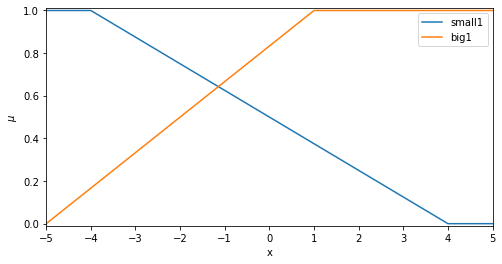

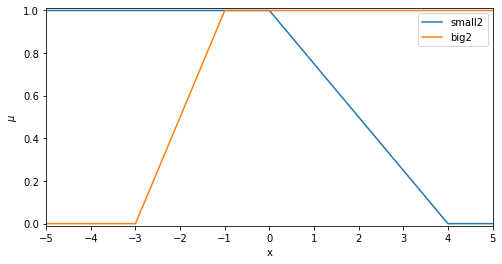

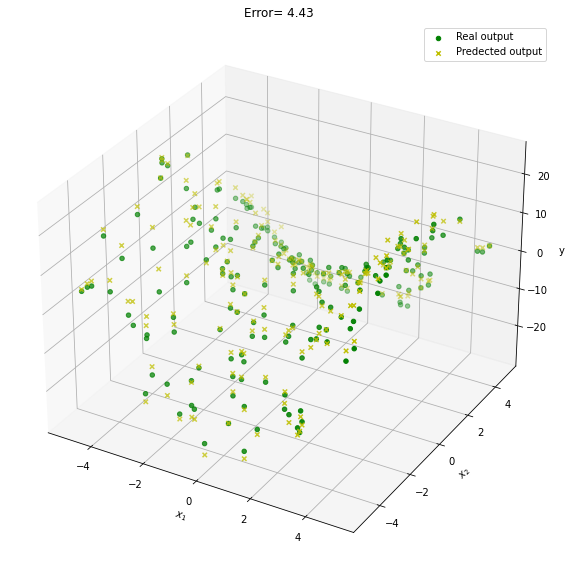

In [21]:
# Model: x2-x1
Input = [x2, x1]
n = 4 # Nember of rules
k = 2 # Number of inputs considered for the Takagi-Sugeno model

pred, e, small_1, big_1, small_2, big_2 = takagi_sugeno(y, Input)

show_results(pred, e, small_1, big_1, small_2, big_2)

### The error for x2-x1 is 4.43. Impressive!

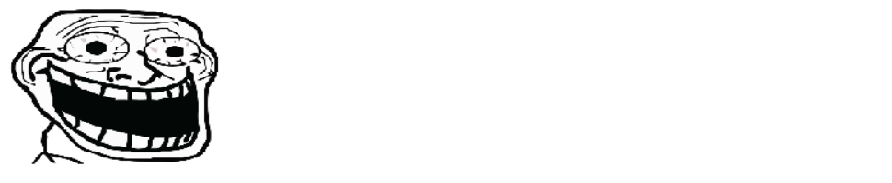

### 3.B. Model: x2-x4

Please wait until the run ends...
Done!
Error: 69.57


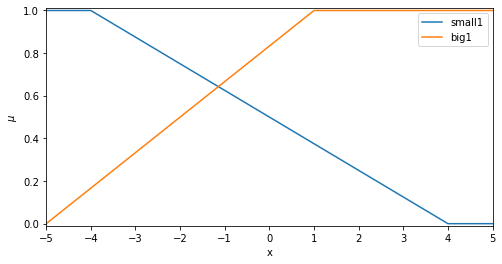

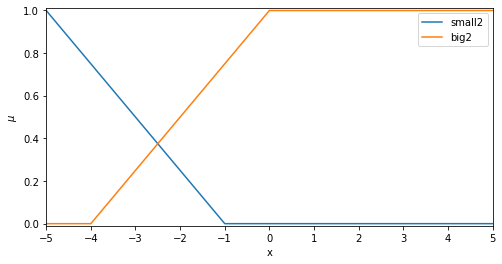

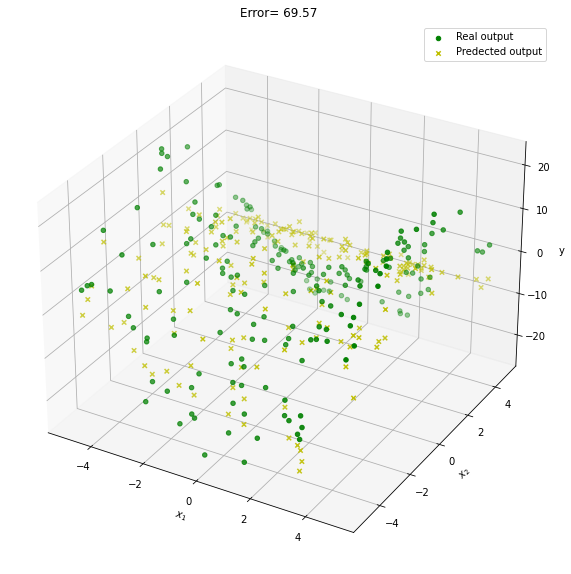

In [22]:
# Model: x2-x4
Input = [x2, x4]
n = 4 # Nember of rules
k = 2 # Number of inputs considered for the Takagi-Sugeno model

pred, e, small_1, big_1, small_2, big_2 = takagi_sugeno(y, Input)

show_results(pred, e, small_1, big_1, small_2, big_2)

### The error for x2-x4 is 69.57, which is more than 50.33, so this is not a suitable choice.

### 3.C. Model: x2-x3

Please wait until the run ends...
Done!
Error: 69.08


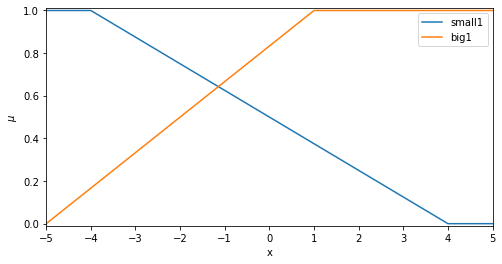

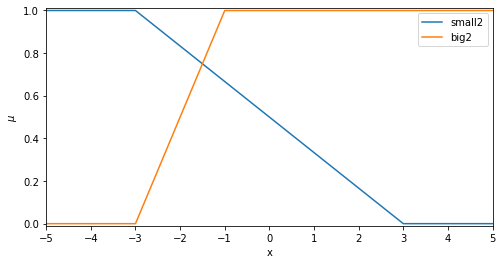

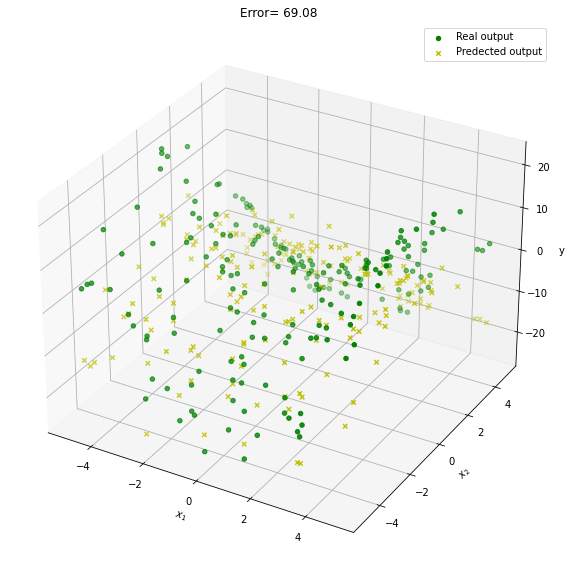

In [23]:
# Model: x2-x3
Input = [x2, x3]
n = 4 # Nember of rules
k = 2 # Number of inputs considered for the Takagi-Sugeno model

pred, e, small_1, big_1, small_2, big_2 = takagi_sugeno(y, Input)

show_results(pred, e, small_1, big_1, small_2, big_2)

### The error for x2-x4 is 69.08, which is more than 50.33, so this is not a suitable choice.

# ------------------------------------------------------------------------------
## As a result, Takagi Sugeno selects the x2-x1 model for this data set, which is as expected and its error is 4.43.
## Let's see the x2-x1 model one more time as conclusion:

Please wait until the run ends...
Done!
Error: 4.43


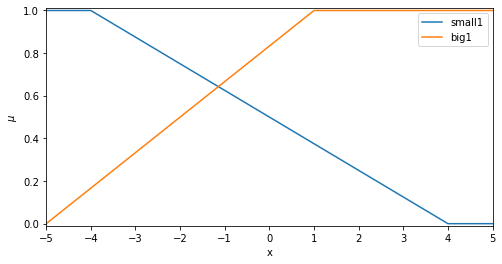

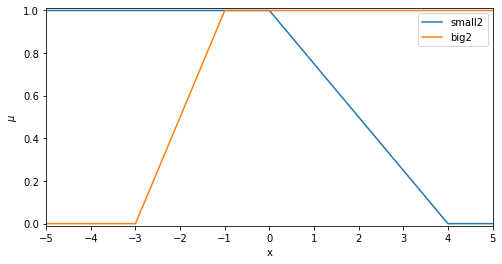

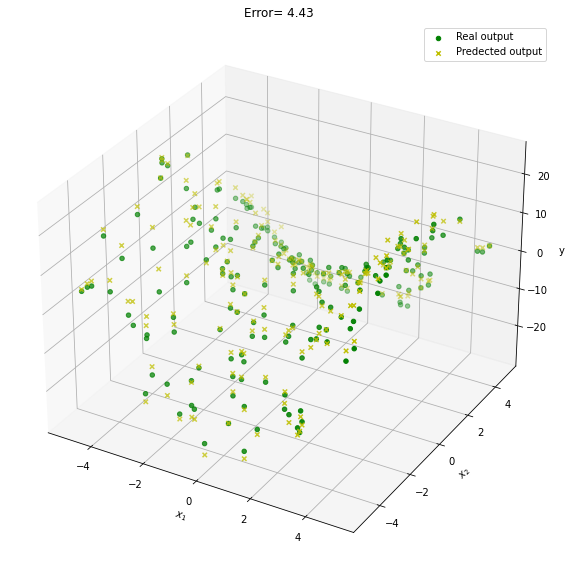

In [24]:
# Model: x2-x1
Input = [x2, x1]
n = 4 # Nember of rules
k = 2 # Number of inputs considered for the Takagi-Sugeno model

pred, e, small_1, big_1, small_2, big_2 = takagi_sugeno(y, Input)

show_results(pred, e, small_1, big_1, small_2, big_2)